# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
import numpy as np

In [2]:
sns.set_style('darkgrid')
file = 'datasets/movies.csv'
df_movies = pd.read_csv(file)

Visualize os dados com um gráfico de dispersão:

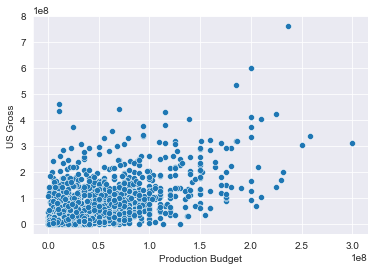

In [3]:
sns.scatterplot(data=df_movies, x='Production Budget', y='US Gross')

Use a regressão linear para encontrar os coeficientes a e b:

In [4]:
no_nan_id = np.isfinite(df_movies["Production Budget"]) & np.isfinite(df_movies["US Gross"])
result = linregress(df_movies["Production Budget"][no_nan_id], df_movies["US Gross"][no_nan_id])
a = result.slope
b = result.intercept
print(f"a: {a}\nb: {b}")

a: 1.0957226466834868
b: 9896486.136543602


Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [5]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

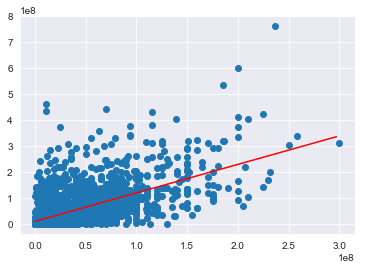

In [6]:
show_regression(df_movies["Production Budget"], df_movies["US Gross"], a, b)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [7]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    '10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.36'
    """
    gross = (a * production_budget) + b
    return gross

## Teste

In [8]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
ok
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    '10992208.78'
ok
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.36'
**********************************************************************
File "__main__", line 9, in __main__.predict
Failed example:
    f'{predict(5000000):.2f}'
Expected:
    '15375099.36'
Got:
    '15375099.37'
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
**********************************************************************
1 items had failures:
   1 of   3 in __main__.predict
3 tests in 4 items.
2 passed and 1 failed.
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=3)